# Mutation Up Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats
from functools import reduce
from MyFunctions import read_fitness, read_bp, read_genes, read_robustness, perc_diff, name, mean_format, rank_sum_format

# Laptop
INPUT_ROOT_DIR = "C://Users//davis//Dropbox//Freiburg Masters Semesters//Thesis//Results//Round02//"

# Desktop
#INPUT_ROOT_DIR = "D://Dropbox_New//Dropbox//Freiburg Masters Semesters//Thesis//Results//Round02//"

OUTPUT_ROOT_DIR = INPUT_ROOT_DIR + "analysis//mut_up_analysis//"
WINDOW_SIZE = 10000
GENOME_WINDOW_SIZE = 5000

print ("Setting up environment...")
# Make sure that the output directories exist and create them if not
if not os.path.exists(OUTPUT_ROOT_DIR):
    os.makedirs(OUTPUT_ROOT_DIR)
    
# stat_fitness_global
if not os.path.exists(OUTPUT_ROOT_DIR + "fitness_global//perc_change"):
    os.makedirs(OUTPUT_ROOT_DIR + "fitness_global//perc_change//")
if not os.path.exists(OUTPUT_ROOT_DIR + "fitness_global//num_and_perc_change//"):
    os.makedirs(OUTPUT_ROOT_DIR + "fitness_global//num_and_perc_change//")
    
# stat_genes_global
if not os.path.exists(OUTPUT_ROOT_DIR + "genes_global//perc_change//"):
    os.makedirs(OUTPUT_ROOT_DIR + "genes_global//perc_change//")
if not os.path.exists(OUTPUT_ROOT_DIR + "genes_global//num_and_perc_change//"):
    os.makedirs(OUTPUT_ROOT_DIR + "genes_global//num_and_perc_change//")
    
# stat_genes_best (for non-coding)
if not os.path.exists(OUTPUT_ROOT_DIR + "genes_best//num_and_perc_change//"):
    os.makedirs(OUTPUT_ROOT_DIR + "genes_best//num_and_perc_change//")
if not os.path.exists(OUTPUT_ROOT_DIR + "bp_best//num_and_perc_change//"):
    os.makedirs(OUTPUT_ROOT_DIR + "bp_best//num_and_perc_change//")

# We need to be able to write out some statistics. Create an output file for this purpose.
LINE = "============================================="

plt.rc('legend',fontsize=20)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

print("done.")

Setting up environment...
done.


## Read in the data for the mutation up condition

In [8]:
print("Reading in mut_up data...")

# stat_fitness_glob
df_seed01_mutation_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_fitness_glob.out")
df_seed02_mutation_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_fitness_glob.out")
df_seed03_mutation_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_fitness_glob.out")
df_seed04_mutation_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_fitness_glob.out")
df_seed05_mutation_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_fitness_glob.out")

stat_fitness_glob = [df_seed01_mutation_up_fitness_global, df_seed02_mutation_up_fitness_global, df_seed03_mutation_up_fitness_global, df_seed04_mutation_up_fitness_global, df_seed05_mutation_up_fitness_global]

# stat_genes_global 
df_seed01_mutation_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_genes_glob.out")
df_seed02_mutation_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_genes_glob.out")
df_seed03_mutation_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_genes_glob.out")
df_seed04_mutation_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_genes_glob.out")
df_seed05_mutation_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_genes_glob.out")

stat_genes_glob = [df_seed01_mutation_up_genes_global, df_seed02_mutation_up_genes_global, df_seed03_mutation_up_genes_global, df_seed04_mutation_up_genes_global, df_seed05_mutation_up_genes_global]

# stat_bp_best (for percent non-coding)
df_seed01_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_bp_best.out")
df_seed02_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_bp_best.out")
df_seed03_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_bp_best.out")
df_seed04_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_bp_best.out")
df_seed05_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_bp_best.out")

stat_bp_best = [df_seed01_mutation_up_bp_best, df_seed02_mutation_up_bp_best, df_seed03_mutation_up_bp_best, df_seed04_mutation_up_bp_best, df_seed05_mutation_up_bp_best]

# stat_fitness_best (for percent non-coding)
df_seed01_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_fitness_best.out")
df_seed02_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_fitness_best.out")
df_seed03_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_fitness_best.out")
df_seed04_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_fitness_best.out")
df_seed05_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_fitness_best.out")

stat_fitness_best = [df_seed01_mutation_up_fitness_best, df_seed02_mutation_up_fitness_best, df_seed03_mutation_up_fitness_best, df_seed04_mutation_up_fitness_best, df_seed05_mutation_up_fitness_best]

print("done.")

Reading in mut_up data...
done.


# Graph out genome size

NameError: name 'seed_color' is not defined

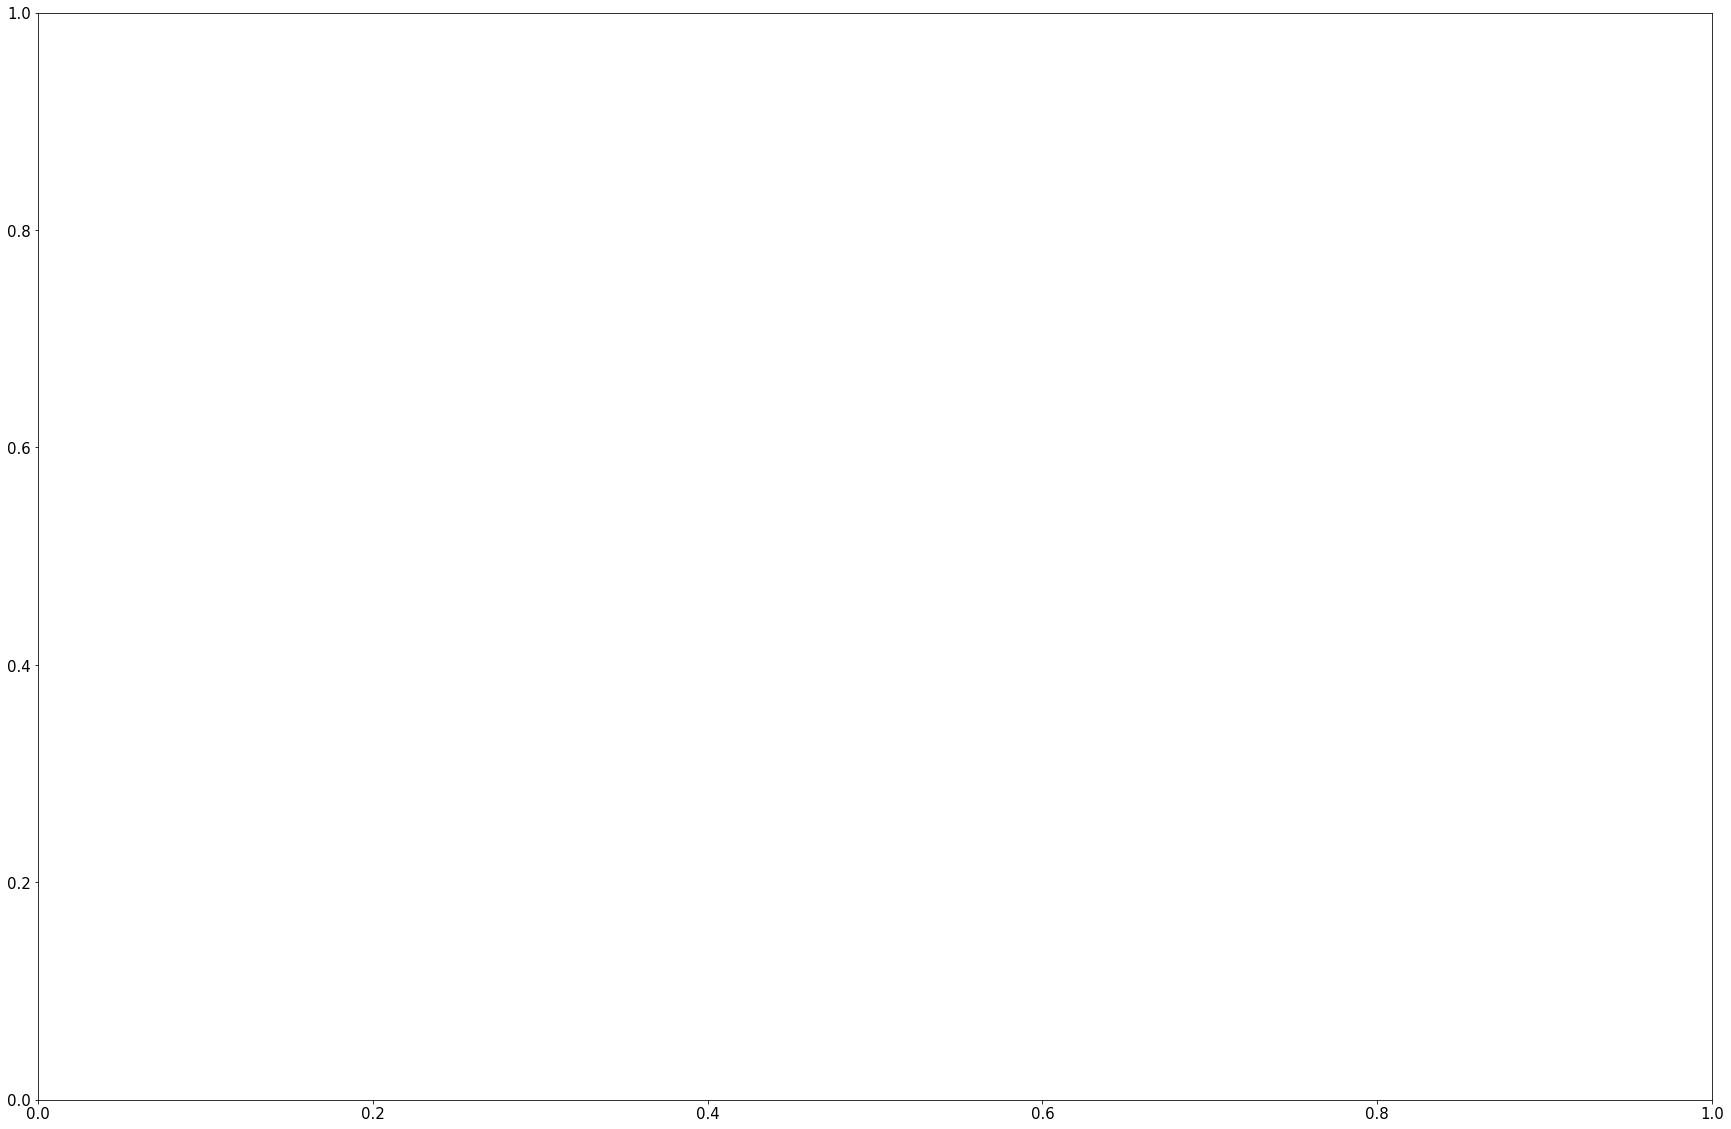

In [11]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)

for index, seed in enumerate(stat_fitness_glob):
    seed.plot(x='generation', y='genome_size', label=name('seed0'+str(index+1)), color=seed_color('seed0'+str(index+1)), ax=ax)
    